# GUIDED CODE WEEK 7

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from scipy import stats

In [2]:
iris = pd.read_csv("iris_missing.csv")
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  148 non-null    float64
 1   Sepal_Width   147 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Summary Statistics 
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,148.000000,147.000000,150.000000,150.000000
mean,5.845270,3.055102,3.758667,1.198667
std,0.833429,0.437957,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Mencari persentse data yang missing 
nulis = iris.isnull().sum()
nulis_percentage = nulis[nulis!=0]/iris.shape[0]*100
print(round(nulis_percentage,2))

Sepal_Length    1.33
Sepal_Width     2.00
dtype: float64


In [6]:
iris[iris.isna().any(axis=1)]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
66,NaN,NaN,4.5,1.5,Iris-versicolor
82,NaN,2.7,3.9,1.2,Iris-versicolor
127,6.1,NaN,4.9,1.8,Iris-virginica
135,7.7,NaN,6.1,2.3,Iris-virginica


In [7]:
df_drop = iris.dropna()
df_drop.shape

(146, 5)

In [8]:
df_konstan = iris.fillna(0) # fill NaN with zero 
df_konstan.shape

(150, 5)

In [9]:
df_mean = iris.fillna(iris.mean()) # fill NaN with mean 
df_mean.shape 

C:\Users\Angeline Marcellina\AppData\Local\Temp\ipykernel_22752\988956693.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = iris.fillna(iris.mean()) # fill NaN with mean


(150, 5)

<AxesSubplot:>

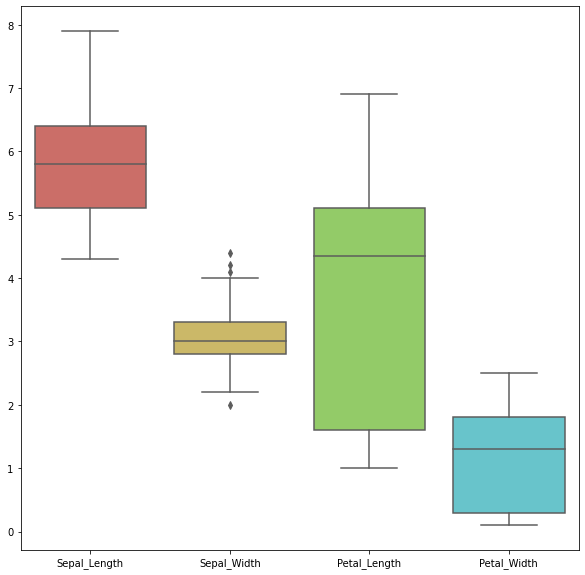

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=iris, palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

In [11]:
# Select data with outlier, will be resolved using Z-Score 

data_sepal = iris[['Sepal_Width']]
data_sepal

,Sepal_Width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [12]:
stats.zscore(data_sepal, nan_policy='omit')

,Sepal_Width
0,1.019322
1,-0.126246
2,0.331981
3,0.102867
4,1.248436
...,...
145,-0.126246
146,-1.271815
147,-0.126246
148,0.790209


In [13]:
# Get data inside 3 sigma 

data_zscore=data_sepal[(np.abs(stats.zscore(data_sepal, nan_policy='omit')) < 3).all(axis=1)]
data_zscore.shape

(146, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

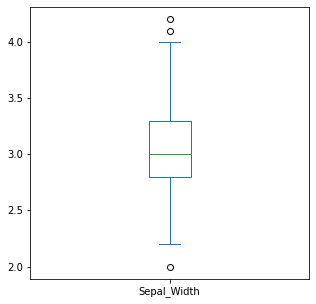

In [14]:
data_zscore.plot(kind='box', figsize=(5,5))
plt.show

In [15]:
# Handling Outlier with IQR 

# Q1, Q3, dan interquartile range 
Q1 = data_sepal.quantile(q=.25)
Q3 = data_sepal.quantile(q=.75)
IQR = Q3-Q1 # IQR=Q3-Q1 or use stats.iqr from scipy 

# take value 1.5*IQR from Qi dan Q3
data_iqr = data_sepal[~((data_sepal < (Q1-1.5*IQR)) | (data_sepal > (Q3+1.5*IQR))).any(axis=1)]
data_iqr.shape

(146, 1)

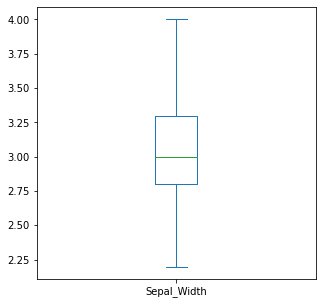

In [16]:
data_iqr.plot(kind='box', figsize=(5,5))
plt.show()

In [17]:
data_zscore.columns = ['Z-Score']
data_iqr.columns = ['IQR']

In [18]:
result = pd.concat([data_sepal, data_zscore, data_iqr], axis=1)

<AxesSubplot:>

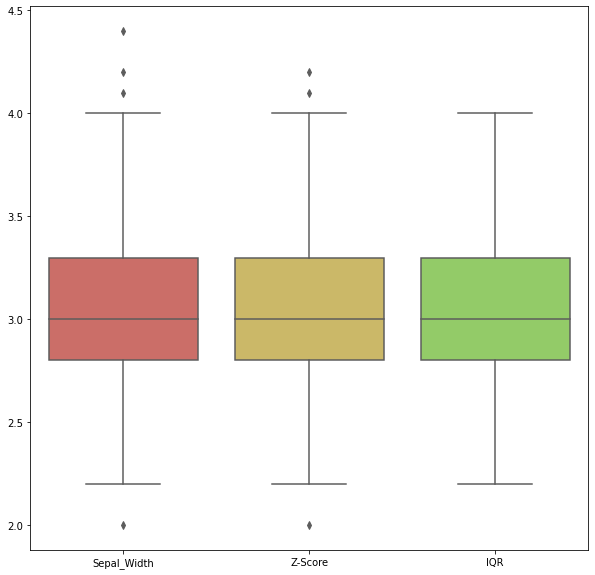

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=result, palette=('#db5f57', '#dbc257', '#91db57' ))

In [20]:
# Train Test Split, basic for Next Week about machine learning, especially classification

import numpy as np 
from sklearn.model_selection import train_test_split 

In [21]:
x = iris[['Sepal_Width', 'Sepal_Length', 'Petal_Width', 'Petal_Length']]
y = iris[['Species']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [23]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(105, 4) (45, 4)
(105, 1) (45, 1)


In [24]:
# Encoding, we need to get the superstore data first 

superstore = pd.read_csv("superstore_Sales.csv")
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [25]:
superstore.groupby('State')['Row ID'].nunique()

State
Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7
Ohio                     454
Oklahoma

In [26]:
superstore.groupby('Category')['Row ID'].nunique()

Category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: Row ID, dtype: int64

In [27]:
# Choosing column 

superstore_cut = superstore[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'State']]
superstore_cut.head()

,Order ID,Order Date,Ship Date,Ship Mode,State
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida


In [28]:
# Encoding State Data 

superstore_cut['State'] = superstore_cut['State'].astype('category')
superstore_cut['State Code'] = superstore_cut['State'].cat.codes
superstore_cut.head()

C:\Users\Angeline Marcellina\AppData\Local\Temp\ipykernel_22752\880593328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore_cut['State'] = superstore_cut['State'].astype('category')
C:\Users\Angeline Marcellina\AppData\Local\Temp\ipykernel_22752\880593328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore_cut['State Code'] = superstore_cut['State'].cat.codes


,Order ID,Order Date,Ship Date,Ship Mode,State,State Code
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California,3
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8


In [29]:
# One-hot encoding Ship Mode

one_hot = pd.get_dummies(superstore_cut['Ship Mode'])
# Drop column B as it is now encoded
# df = df.drop('B', axis = 1)
# Join the encoded df 
superstore_cut = superstore_cut.join(one_hot)
superstore_cut.head()

,Order ID,Order Date,Ship Date,Ship Mode,State,State Code,First Class,Same Day,Second Class,Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15,0,0,1,0
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15,0,0,1,0
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California,3,0,0,1,0
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8,0,0,0,1
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8,0,0,0,1


# Exercise

In [30]:
# a. Replace missing value on Postal Code with mode(modus/nilai yang sering muncul) the Postal Code

ss = pd.read_csv('superstore_sales.csv')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [32]:
ss.describe()
nulis = ss.isnull().sum()
nulis_percentage = nulis[nulis!=0]/ss.shape[0]*100
print(round(nulis_percentage,2))

Postal Code    0.11
dtype: float64


In [33]:
ss[ss.isna().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [34]:
df_mode = ss.fillna(iris.mode()) # fill NaN with mean 
df_mode.shape 

(9800, 18)

In [35]:
ss.fillna(ss['Postal Code'].mode()[0], inplace = True)

In [37]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float